In [1]:
# Import all libraries needed for the tutorial

# General syntax to import specific functions in a library: 
##from (library) import (specific library function)
from pandas import DataFrame, read_csv, Series

# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number

# Enable inline plotting
%matplotlib inline

In [2]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)

Python version 3.4.0 (default, Apr 11 2014, 13:05:11) 
[GCC 4.8.2]
Pandas version 0.16.2


In [3]:
# The inital set of baby names and bith rates
names = ['Bob','Jessica','Mary','John','Mel']
births = [968, 155, 77, 578, 973]

In [4]:
zip?

In [5]:
BabyDataSet = zip(names,births)
BabyDataSet = list(BabyDataSet)
BabyDataSet

[('Bob', 968), ('Jessica', 155), ('Mary', 77), ('John', 578), ('Mel', 973)]

In [6]:
df = pd.DataFrame(data = BabyDataSet, columns=['Names', 'Births'])
df

Names  Births
0      Bob     968
1  Jessica     155
2     Mary      77
3     John     578
4      Mel     973

In [7]:
df.to_csv?

In [8]:
df.to_csv('births1880.csv',index=False,header=False)

In [9]:
read_csv?

In [10]:
# path of csv file
location = 'births1880.csv'
df = pd.read_csv(location)

In [11]:
df
# This brings us the our first problem of the exercise. The read_csv function treated the first
# record in the csv file as the header names. This is obviously not correct since the text file 
# did not provide us with header names.

Bob  968
0  Jessica  155
1     Mary   77
2     John  578
3      Mel  973

In [12]:
# To correct this we will pass the header parameter to the read_csv function and set it to None (means null in python).
df = pd.read_csv(location, header=None)
df

0    1
0      Bob  968
1  Jessica  155
2     Mary   77
3     John  578
4      Mel  973

In [13]:
# If we wanted to give the columns specific names, we would have to pass another paramter called names.
df = pd.read_csv(location, names=['Names','Births'])
df
# You can think of the numbers [0,1,2,3,4] as the row numbers in an Excel file. In pandas these are part of 
# the index of the dataframe. You can think of the index as the primary key of a sql table with the exception
# that an index is allowed to have duplicates.

Names  Births
0      Bob     968
1  Jessica     155
2     Mary      77
3     John     578
4      Mel     973

In [14]:
import os
os.remove(location)

In [15]:
# Check data type of the columns
df.dtypes

Names     object
Births     int64
dtype: object

In [16]:
# Check data type of Births column
df.Births.dtype

dtype('int64')

In [17]:
# Analyze Data
# Method 1:
Sorted = df.sort(['Births'], ascending=False)
Sorted.head(1)

Names  Births
4   Mel     973

In [18]:
# Method 2:
df['Births'].max()

973

The most popular name


Names  Births
4   Mel     973

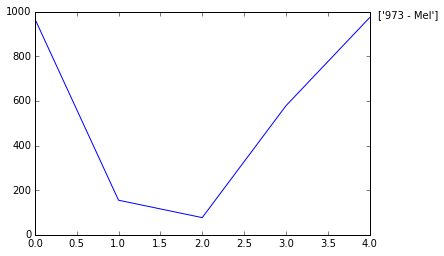

In [20]:
# Present Data
# Create graph
df['Births'].plot()

# Maximum value in the data set
MaxValue = df['Births'].max()

# Name associated with the maximum value
MaxName = df['Names'][df['Births'] == df['Births'].max()].values

# Text to display on graph
Text = str(MaxValue) + " - " + MaxName

# Add text to graph
plt.annotate(Text, xy=(1, MaxValue), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

print("The most popular name")
df[df['Births'] == df['Births'].max()]
#Sorted.head(1) can also be used